# Introduction 

### Descriptive Stats 

```
Mostly viulization Histogram
Scatter plots used 
```

### Inferential Statistics

```
Used to infer properties from a dataset
Usually looking for certain properties that will allow us to make predictions
Test different hypotheses

Hypothesis testing is a major component of inferential statistics
Determine if the observed trend is due to randomness or if there is a real statistical
significance

Define a hypothesis and a null hypothesis
The hypothesis is usually the trend we are trying to extract from the data
The null hypothesis is its exact opposite

```

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import  statsmodels.api as sm

%matplotlib inline 

In [23]:
sns.set_style('whitegrid')

plt.rcParams["figure.figsize"] = [13,4]

###  Descriptive Stats

In [9]:
# Dataset

df = pd.read_csv("D:\Learning\Timeseries\data\shampoo.csv")

In [25]:
df.head(10)

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [26]:
df.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


<AxesSubplot: ylabel='Density'>

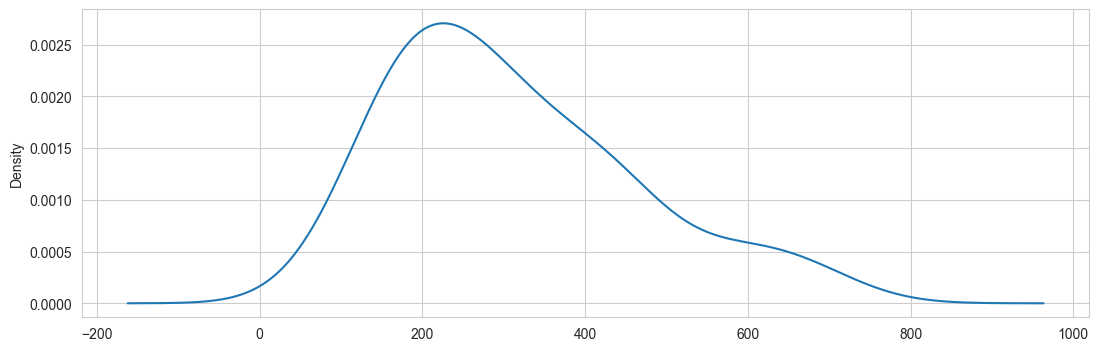

In [27]:
df.Sales.plot(kind="kde")

<AxesSubplot: >

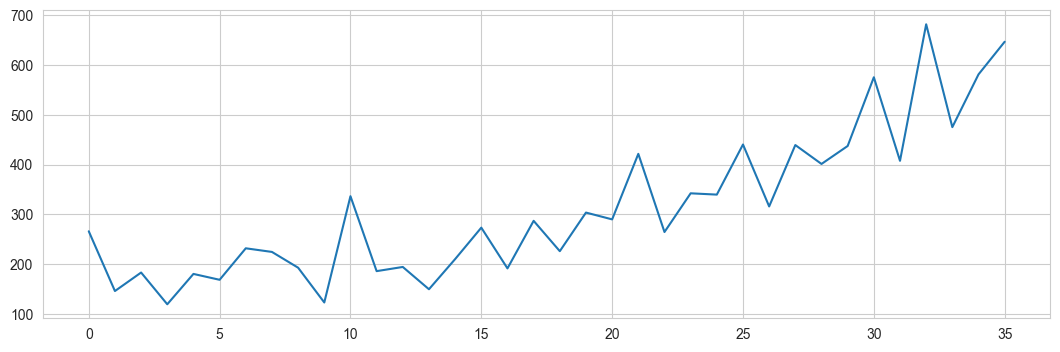

In [24]:
df.Sales.plot(kind="line")

<AxesSubplot: ylabel='Frequency'>

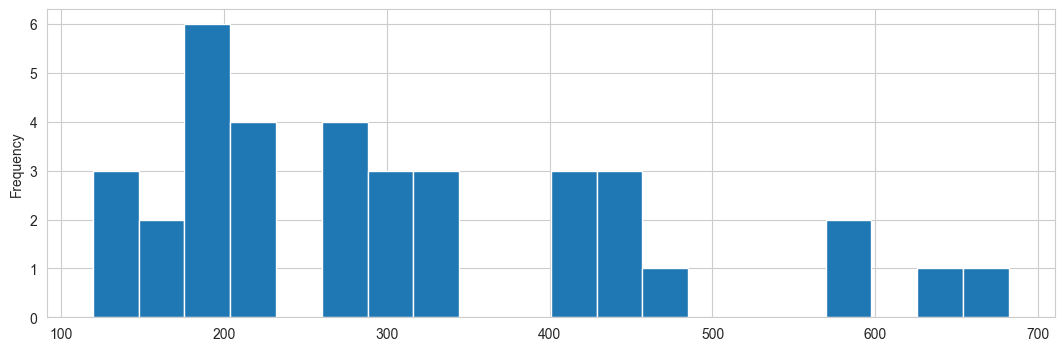

In [29]:
df.Sales.plot(kind="hist",bins=20)

<AxesSubplot: xlabel='Month', ylabel='Sales'>

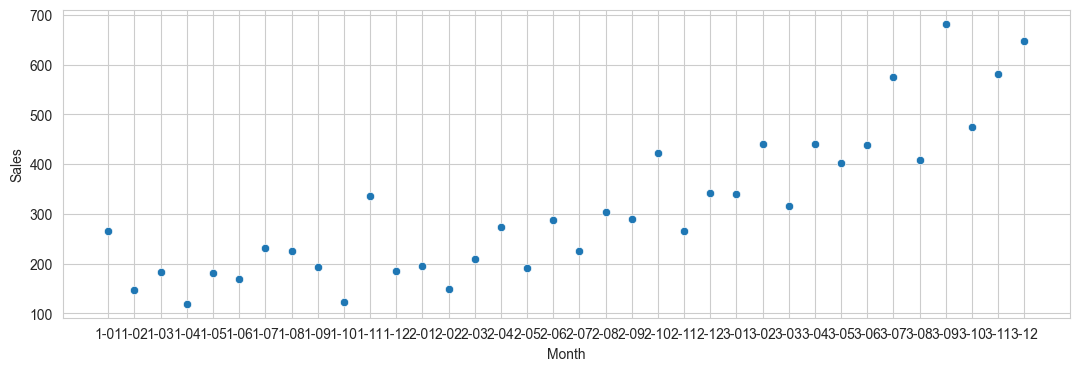

In [39]:
sns.scatterplot(x=df["Month"],y=df["Sales"])

### Inferencial Stats

In [43]:
# Dataset

co2 = pd.read_csv("D:\Learning\Timeseries\data\co2_dataset.csv")

In [44]:
co2.head()

,year,data_mean_global,data_mean_nh,data_mean_sh
0,0,277.454,277.454,277.454
1,1,277.137,277.137,277.137
2,2,277.160,277.160,277.160
3,3,277.158,277.158,277.158
4,4,277.157,277.157,277.157


In [46]:
co2.describe()

,year,data_mean_global,data_mean_nh,data_mean_sh
count,2015.000000,2015.000000,2015.000000,2015.000000
mean,1007.000000,282.609005,282.649649,282.568361
std,581.824716,13.221578,13.422855,13.020503
min,0.000000,276.272000,276.272000,276.272000
25%,503.500000,278.059000,278.059000,278.059000
50%,1007.000000,279.339000,279.339000,279.338000
75%,1510.500000,281.787000,281.787000,281.785156
max,2014.000000,397.546977,399.590917,395.503037


In [47]:
X = co2["year"].values[1950:]
y = co2["data_mean_global"].values[1950:]

<AxesSubplot: >

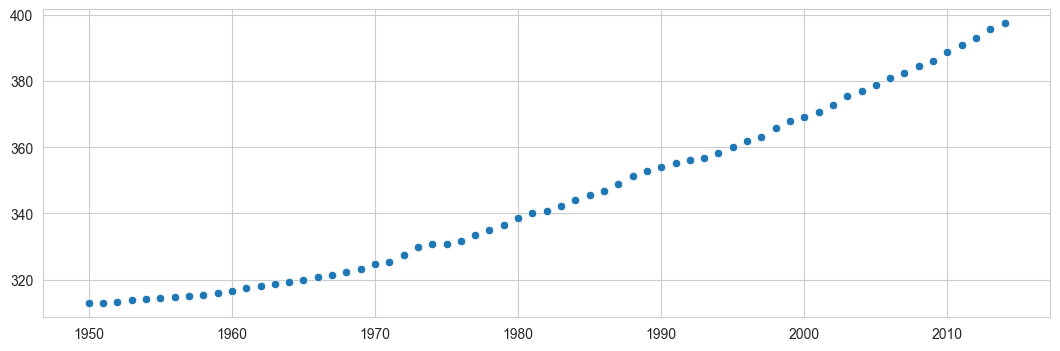

In [48]:
sns.scatterplot(x=X,y=y)

>  Baseline Model

In [51]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)


reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [54]:
print(f"Slope : {reg.coef_[0][0]} ,Intercept :  {reg.intercept_[0]} ")

Slope : 1.3588711929434647 ,Intercept :  -2348.0338300545372 


>TODO
-- Fit the line plot with actual values

In [56]:
X = co2["year"].values[1950:]
y = co2["data_mean_global"].values[1950:]


predictions = reg.predict(X.reshape(-1,1))

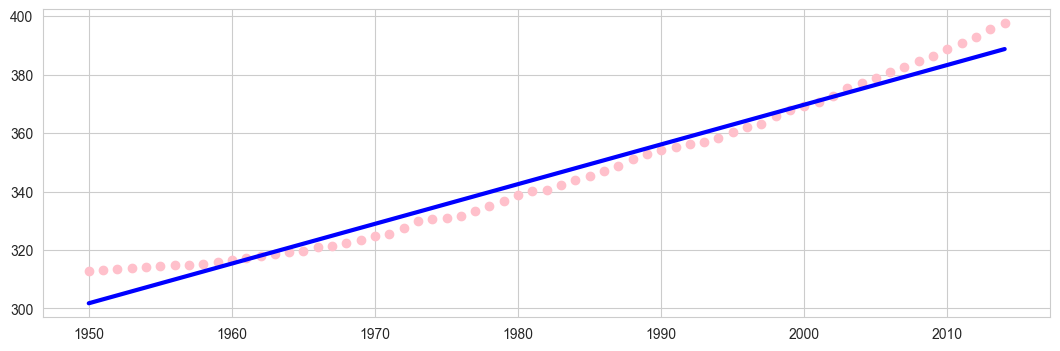

In [68]:
plt.scatter(X,y,c="pink")
plt.plot(X,predictions,c="blue",linewidth=3)

In [72]:
X = sm.add_constant(co2["year"].values[1950:])

model = sm.OLS(co2["data_mean_global"].values[1950:],X).fit()

In [73]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     2073.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           6.40e-50
Time:                        00:05:20   Log-Likelihood:                -189.19
No. Observations:                  65   AIC:                             382.4
Df Residuals:                      63   BIC:                             386.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2348.0338     59.161    -39.689      0.000   -2466.259   -2229.809
x1             1.3589      0.030     45.526      0.000       1.299       1.419
==============================================================================
Omnibus:                        7.614   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.820
Skew:                           0.812   Prob(JB):                       0.0200
Kurtosis:                       2.497   Cond. No.                     2.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

```R-squared: High (Good)
   F-statistic: High (High) might be good fit

   const (constant) intersept and x1 (slope) :
       P>|t| : 0.00 less than 0.05 (coefficients seems relevant)

    But model is really good fit ?

    Lets check Q-Q plot

    And check the assumptions by setting the residuals 
```

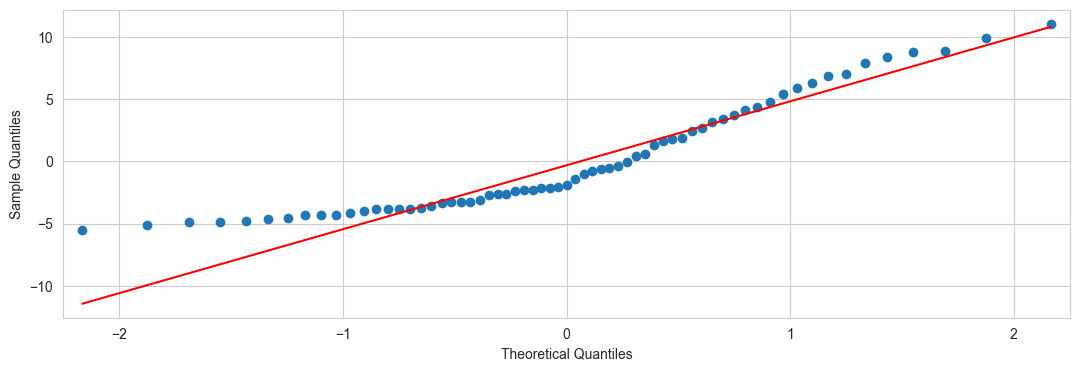

In [74]:
residuals = model.resid

qq_plot = sm.qqplot(residuals,line="q")

### Conclusion

Blue line : Fitted Residuals 
Red line : Coming from theoretical normal distribution quantiles

Our model is not good fit for these situations Blue line is not not a straight line. Residuals (the errors) are not from the Normal distribution.

They are not due to chance to randomness

Lets check it distribution

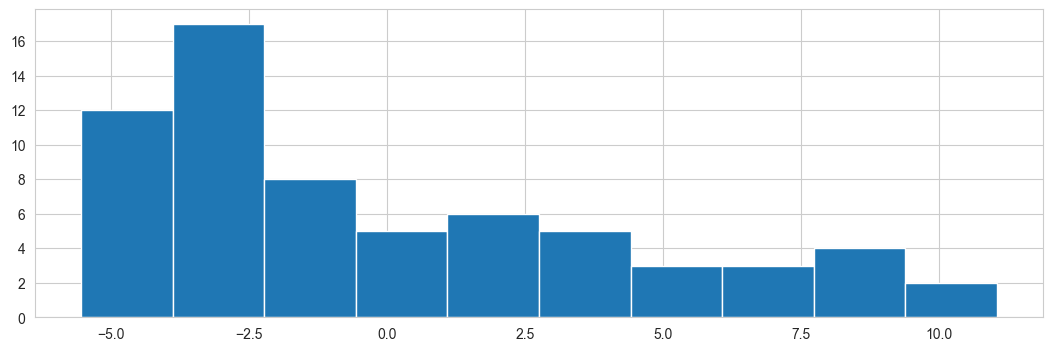

In [77]:
plt.hist(residuals);